危険度関数
机とタンスの距離に依存する

0.01736130771060483


C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\1924329311.py:11: RuntimeWarning: divide by zero encountered in divide
  sita = np.arctan(D/x)
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\1924329311.py:24: RuntimeWarning: invalid value encountered in sqrt
  v1 = h_shelf * np.sqrt((2 * g * m * delta_H / 100) / Iy) #家具頭部速度
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\1924329311.py:27: RuntimeWarning: divide by zero encountered in power
  acc = v3 / (v2 * m_shelf)**(-0.55) / 0.15 / 9.80665 #頭部最大加速度
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\1924329311.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\1924329311.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignore

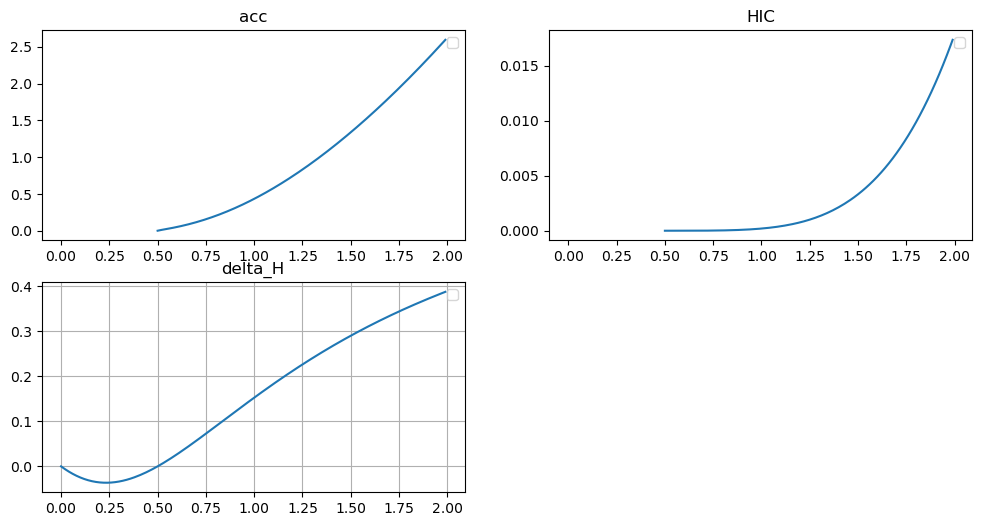

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def calc_acc(x):
    H = 1.1 #タンスの重心
    D = 0.9 #椅子に座った人がタンスと衝突する地点の高さ
    B = 0.57 #タンスの奥行き
    L = np.sqrt((B/2)**2 + H**2)
    alpha = np.arcsin(H/L)
    sita = np.arctan(D/x)
    ddH = B/2 * np.tan(np.pi/2 - sita)
    dH = (H + ddH) * np.sin(sita)
    delta_H =   H - dH

    m_shelf = 110 #タンスの質量 kg
    h_shelf = 1.7 #箪笥の高さ
    m_head = 6.08 #頭部の質量 kg
    alpha1 = 0.07
    Iy = 176.98 #慣性モーメント kg*m^2
    g = 9.80665 #重力加速度
    m = 87

    v1 = h_shelf * np.sqrt((2 * g * m * delta_H / 100) / Iy) #家具頭部速度
    v2 = v1 * (x / h_shelf) #家具衝突速度
    v3 = m_shelf *v2 * alpha1 / m_head #衝突後の頭部速度
    acc = v3 / (v2 * m_shelf)**(-0.55) / 0.15 / 9.80665 #頭部最大加速度
    
    HIC = 0.0016 * (acc)**2.5
    
    return HIC,acc,delta_H

x = np.arange(0, 2.0, 0.01)
HIC,acc,v1 = calc_acc(x)
print(max(HIC))
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, acc)
ax1.set_title('acc')
ax1.legend()
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, HIC)
ax2.set_title('HIC')
ax2.legend()
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x, v1)
ax3.set_title('delta_H')
ax3.legend()
plt.grid()
plt.show()



C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\2199068695.py:11: RuntimeWarning: divide by zero encountered in divide
  sita = np.arctan(D/x)
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\2199068695.py:28: RuntimeWarning: divide by zero encountered in power
  acc = v3 / (v2 * m_shelf)**(-0.55) / 0.15 / 9.80665 * 3 #頭部最大加速度
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\2199068695.py:35: RuntimeWarning: divide by zero encountered in divide
  asi = 1 / (1 + np.exp((1.54 + 200 / HIC) - 0.0065 * HIC))
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\2199068695.py:35: RuntimeWarning: overflow encountered in exp
  asi = 1 / (1 + np.exp((1.54 + 200 / HIC) - 0.0065 * HIC))
C:\Users\salab_students\AppData\Local\Temp\ipykernel_8668\2199068695.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\salab_student

2382.479803058371


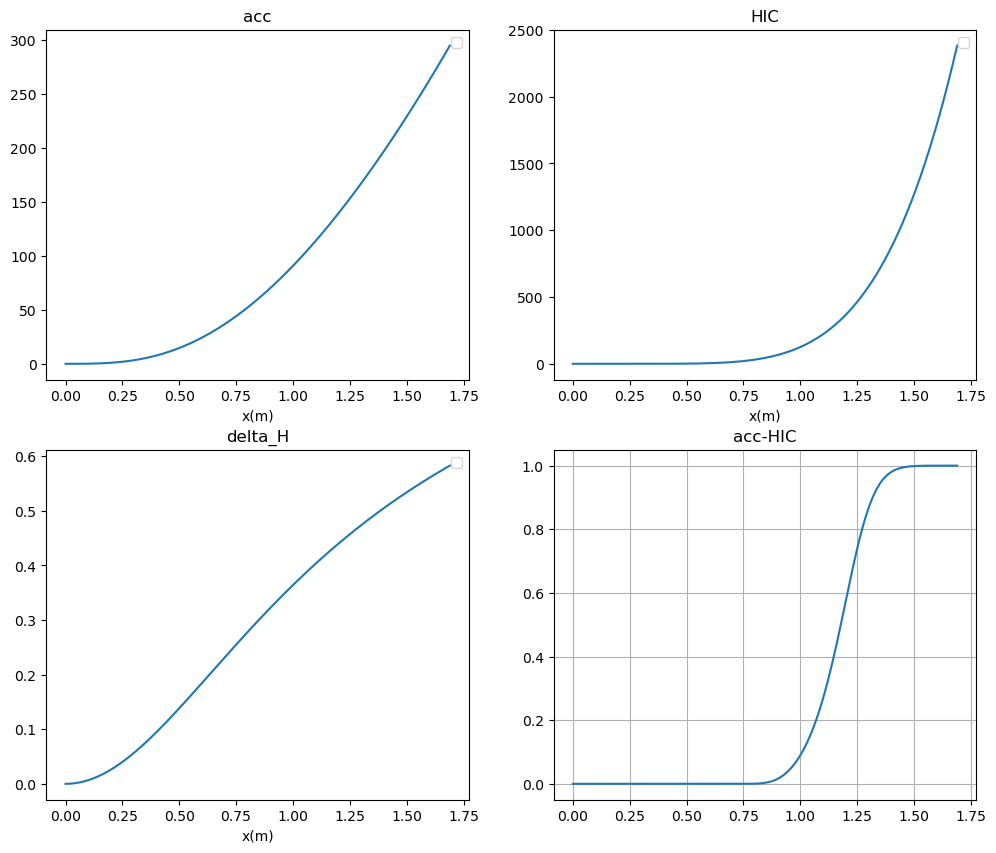

125.3179162938043 90.68955543686826 0.36413879521530546 3.1853360988425883


In [50]:
import numpy as np
import matplotlib.pyplot as plt


def calc_acc(x):
    H = 1.1 #タンスの重心
    D = 0.9 #椅子に座った人がタンスと衝突する地点の高さ
    B = 0.57 #タンスの奥行き
    L = np.sqrt((B/2)**2 + H**2)
    alpha = np.arcsin(H/L)
    sita = np.arctan(D/x)
    #delta_H =   L * np.sin(alpha+sita)
    delta_H = H - H * np.sin(sita) #タンスの高さ
    
    delta_H = delta_H * 100

    m_shelf = 110 #タンスの質量 kg
    h_shelf = 1.7 #箪笥の高さ
    m_head = 6.08 #頭部の質量 kg
    alpha1 = 0.07
    Iy = 176.98 #慣性モーメント kg*m^2
    g = 9.80665 #重力加速度
    m = 87

    v1 = h_shelf * np.sqrt((2 * g * m * delta_H / 100) / Iy) #家具頭部速度
    v2 = v1 * (x / h_shelf) #家具衝突速度
    v3 = m_shelf *v2 * alpha1 / m_head #衝突後の頭部速度
    acc = v3 / (v2 * m_shelf)**(-0.55) / 0.15 / 9.80665 * 3 #頭部最大加速度
    
    HIC = 0.0016 * (acc)**2.5
    yy = np.sin(sita)
    return HIC,acc, delta_H/100,v1

def ASI1(HIC):
    asi = 1 / (1 + np.exp((1.54 + 200 / HIC) - 0.0065 * HIC))
    return asi

x = np.arange(0, 1.7, 0.01)
HIC,acc,v1,v = calc_acc(x)

xx = np.linspace(0,1000, 100)
a = ASI1(HIC)
print(max(HIC))
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, acc)
ax1.set_title('acc')
ax1.set_xlabel('x(m)')
ax1.legend()
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, HIC)
ax2.set_title('HIC')
ax2.set_xlabel('x(m)')
ax2.legend()
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x, v1)
ax3.set_title('delta_H')
ax3.set_xlabel('x(m)')
ax3.legend()
ax4 = fig.add_subplot(2,2,4)
ax4.plot(x,a)
ax4.set_title('acc-HIC')
plt.grid()
plt.show()

x2 = 1
h2,a2,d2,v2 = calc_acc(x2)
print(h2,a2,d2,v2)